## Question 1 - Extracting Tesla Stock Data Using yfinance

In [3]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [25]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [32]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [33]:
response = requests.get(url)

In [34]:
soup = BeautifulSoup(response.content, "html.parser")

In [35]:
# Encontrar la tabla de ingresos de Tesla
tables = soup.find_all("table")
if len(tables) > 1:
    table = tables[1]  # Selecciona la segunda tabla si es donde están los ingresos
    rows = table.find_all("tr")

    # Extrae los datos de la tabla
    revenue_data = []
    for row in rows[1:]:  # Omitimos la primera fila de encabezados
        columns = row.find_all("td")
        if len(columns) >= 2:
            date = columns[0].text.strip()  # Fecha
            revenue = columns[1].text.strip()  # Ingreso
            revenue_data.append([date, revenue])

    # Crear un DataFrame con los datos extraídos
    tesla_revenue = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])

    # Convertir la columna 'Date' a formato datetime
    tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

    # Limpiar la columna 'Revenue' para eliminar símbolos de dólar y comas, y convertir a número
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True).astype(float)
else:
    print("No se encontró la tabla de ingresos en la página.")


No se encontró la tabla de ingresos en la página.


## Question 3 - Extracting GameStop stock data using yfinance

In [9]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [37]:
import yfinance as yf

## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [4]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

## Question 5 - Tesla Stock and Revenue Dashboard

In [13]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


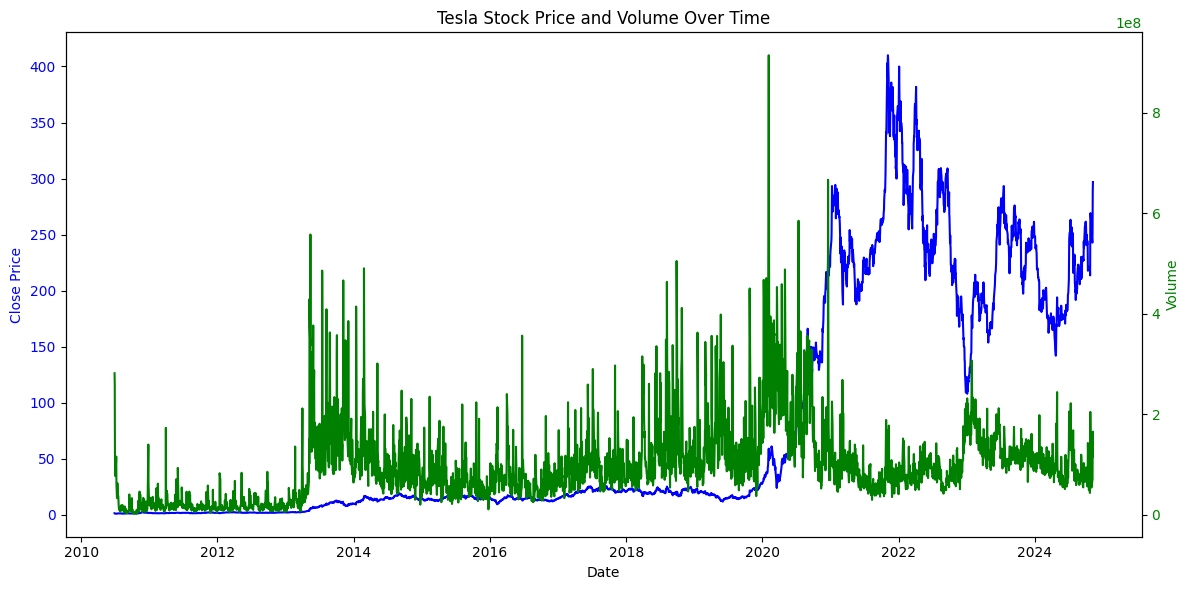

In [15]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.plot(tesla_data['Date'], tesla_data['Close'], color='b', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(tesla_data['Date'], tesla_data['Volume'], color='g', label='Volume')
ax2.set_ylabel('Volume', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("Tesla Stock Price and Volume Over Time")
fig.tight_layout()
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard

In [14]:
!pip install yfinance
!pip install matplotlib

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [22]:
revenue_data = {
    "Date": ["2021-01-31", "2020-01-31", "2019-01-31", "2018-01-31", "2017-01-31"],
    "Revenue": [5165000000, 6465000000, 8175000000, 8965000000, 8554000000]
}
gamestop_revenue = pd.DataFrame(revenue_data)
gamestop_revenue["Date"] = pd.to_datetime(gamestop_revenue["Date"])
gamestop_revenue.head()

,Date,Revenue
0,2021-01-31,5165000000
1,2020-01-31,6465000000
2,2019-01-31,8175000000
3,2018-01-31,8965000000
4,2017-01-31,8554000000


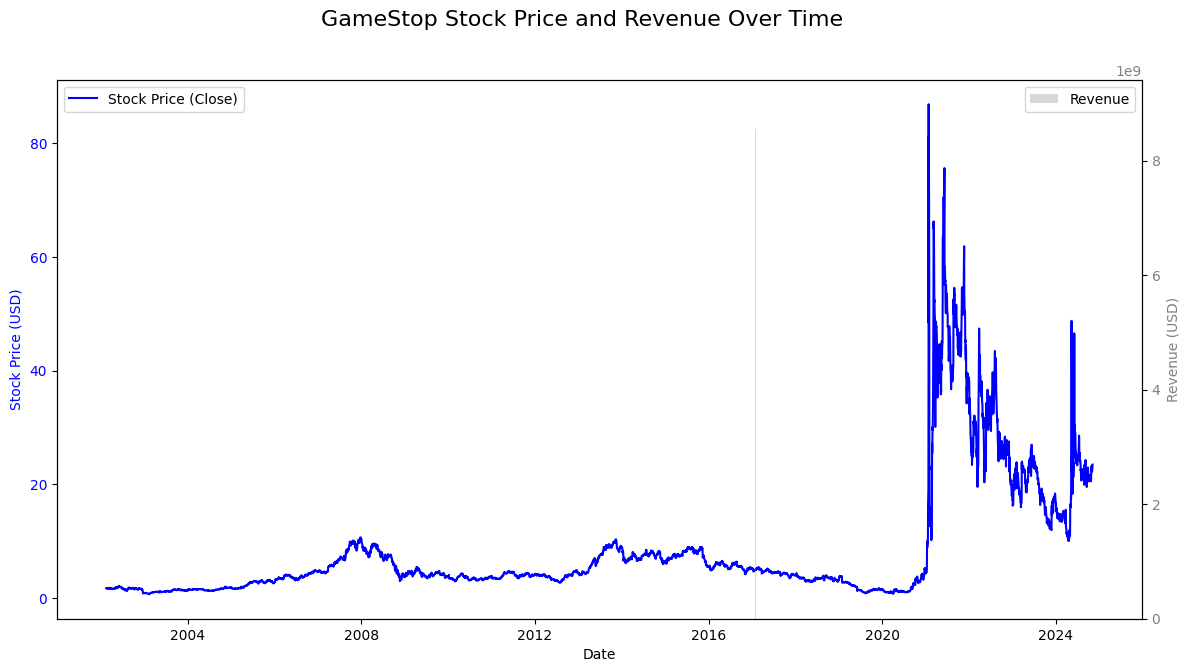

In [23]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(gamestop_data["Date"], gamestop_data["Close"], color="blue", label="Stock Price (Close)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.bar(gamestop_revenue["Date"], gamestop_revenue["Revenue"], color="gray", alpha=0.3, label="Revenue")
ax2.set_ylabel("Revenue (USD)", color="gray")
ax2.tick_params(axis="y", labelcolor="gray")

fig.suptitle("GameStop Stock Price and Revenue Over Time", fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

## Question 7 - Sharing your Assignment Notebook

# Author:

Brenda Ximena Perez